<a href="https://colab.research.google.com/github/AnjuAlex66/Zylentrix/blob/main/Zylentrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Analyst Intern Assignment: Analyse User
Engagement on an Online Learning Platform**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Students**

In [ ]:
students=pd.read_csv('/content/drive/MyDrive/Zylentrix/students.csv')
students

,Student_ID,Name,Age,Gender,Location,Enrolment_Date
0,S001,Student_1,24,Female,Kolkata,24/11/2023
1,S002,Student_2,32,Other,Chennai,27/02/2023
2,S003,Student_3,28,Other,Mumbai,13/01/2023
3,S004,Student_4,25,Female,Bangalore,21/05/2023
4,S005,Student_5,24,Other,Delhi,06/05/2023
...,...,...,...,...,...,...
95,S096,Student_96,32,Other,Chennai,19/12/2023
96,S097,Student_97,31,Other,Chennai,13/10/2023
97,S098,Student_98,20,Other,Kolkata,23/04/2023
98,S099,Student_99,18,Male,Kolkata,17/12/2023


In [ ]:
students.dtypes

,0
Student_ID,object
Name,object
Age,int64
Gender,object
Location,object
Enrolment_Date,object


In [ ]:
students['Enrolment_Date'] = pd.to_datetime(students['Enrolment_Date'], dayfirst=True)



In [ ]:
students.dtypes

,0
Student_ID,object
Name,object
Age,int64
Gender,object
Location,object
Enrolment_Date,datetime64[ns]


In [ ]:
students.isnull().sum()

,0
Student_ID,0
Name,0
Age,0
Gender,0
Location,0
Enrolment_Date,0


In [ ]:
int(students.duplicated().sum())

0

# **Feedback**

In [ ]:
feedback=pd.read_csv('/content/drive/MyDrive/Zylentrix/feedback.csv')
feedback

,Student_ID,Course_ID,Rating,Feedback_Text
0,S057,UX303,2,Too fast-paced
1,S063,PY202,2,Loved the examples
2,S022,PY202,4,Could be better
3,S011,PY202,5,Needs improvement
4,S073,WD404,4,Could be better
...,...,...,...,...
75,S087,DM101,1,Well structured
76,S065,DM101,4,Loved the examples
77,S082,WD404,2,Too fast-paced
78,S067,DM101,5,Excellent instructor


In [ ]:
feedback.dtypes

,0
Student_ID,object
Course_ID,object
Rating,int64
Feedback_Text,object


In [ ]:
feedback.isnull().sum()

,0
Student_ID,0
Course_ID,0
Rating,0
Feedback_Text,0


In [ ]:
int(feedback.duplicated().sum())

0

## **Course Activity**

In [ ]:
course_activity=pd.read_csv('/content/drive/MyDrive/Zylentrix/course_activity.csv')
course_activity

,Student_ID,Course_ID,Date,Time_Spent_Minutes,Completion_Percentage
0,S001,PY202,05/01/2024,90,46.10
1,S001,DM101,28/01/2024,155,88.87
2,S001,UX303,28/01/2024,177,54.93
3,S002,PY202,03/02/2024,45,32.20
4,S002,UX303,15/03/2024,119,90.80
...,...,...,...,...,...
654,S100,PY202,03/03/2024,83,22.63
655,S100,UX303,27/02/2024,168,14.83
656,S100,UX303,02/01/2024,134,22.29
657,S100,WD404,12/03/2024,139,68.78


In [ ]:
course_activity.dtypes

,0
Student_ID,object
Course_ID,object
Date,object
Time_Spent_Minutes,int64
Completion_Percentage,float64


In [ ]:
course_activity['Date'] = pd.to_datetime(course_activity['Date'], dayfirst=True)

In [ ]:
course_activity.dtypes

,0
Student_ID,object
Course_ID,object
Date,datetime64[ns]
Time_Spent_Minutes,int64
Completion_Percentage,float64


In [ ]:
course_activity.isnull().sum()

,0
Student_ID,0
Course_ID,0
Date,0
Time_Spent_Minutes,0
Completion_Percentage,0


In [ ]:
int(course_activity.duplicated().sum())

0

**Overall average completion rate across courses**

In [ ]:
Average_completion_rate = round(course_activity['Completion_Percentage'].mean(),2)
print(f"Average Completion Rate: {Average_completion_rate}%")

Average Completion Rate: 54.78%


**Course has the highest and lowest average engagement
time**

In [ ]:
avg_engagement_time_by_course = course_activity.groupby('Course_ID')['Time_Spent_Minutes'].mean()
avg_engagement_time_by_course

print("Course having the highest average engagement time:", avg_engagement_time_by_course.idxmax(),avg_engagement_time_by_course.max())
print("Course having the lowest average engagement time :",  avg_engagement_time_by_course.idxmin(), avg_engagement_time_by_course.min())

Course having the highest average engagement time: DM101 102.42767295597484
Course having the lowest average engagement time : PY202 93.90243902439025


**Average Engagement Time per Course**

<ipython-input-41-ba087a7b7c2b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_engagement, x='Course_ID', y='Time_Spent_Minutes', palette='viridis')


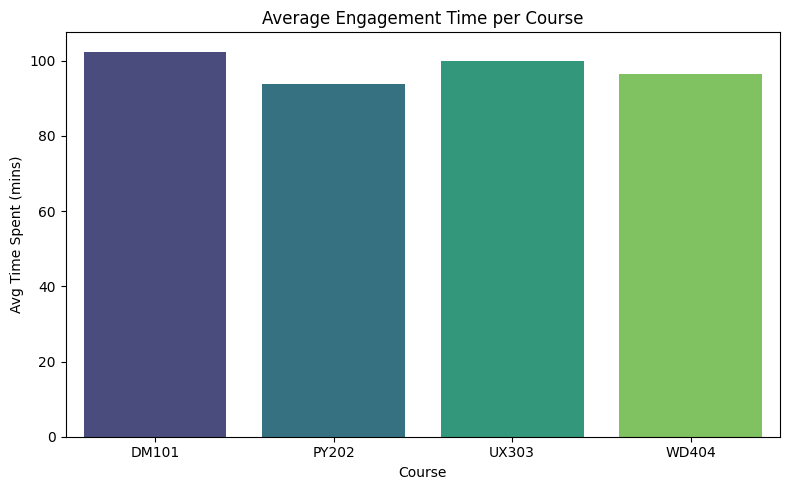

In [ ]:


avg_engagement = course_activity.groupby('Course_ID')['Time_Spent_Minutes'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=avg_engagement, x='Course_ID', y='Time_Spent_Minutes', palette='viridis')
plt.title('Average Engagement Time per Course')
plt.xlabel('Course')
plt.ylabel('Avg Time Spent (mins)')
plt.tight_layout()
plt.show()

The course DM101 has the highest average engagement time of 102.43, while the course PY202 has the lowest average engagement time of 93.90.

**Engagement differ by age group or location**

In [ ]:
students['Age_Group'] = pd.cut(students['Age'], bins=[15, 20, 25, 30, 35], labels=['16–20','21–25','26–30','31–35'])



In [ ]:
merged_students_courses=pd.merge(students,course_activity,on='Student_ID')
merged_students_courses

,Student_ID,Name,Age,Gender,Location,Enrolment_Date,Age_Group,Course_ID,Date,Time_Spent_Minutes,Completion_Percentage
0,S001,Student_1,24,Female,Kolkata,2023-11-24,21–25,PY202,2024-01-05,90,46.10
1,S001,Student_1,24,Female,Kolkata,2023-11-24,21–25,DM101,2024-01-28,155,88.87
2,S001,Student_1,24,Female,Kolkata,2023-11-24,21–25,UX303,2024-01-28,177,54.93
3,S002,Student_2,32,Other,Chennai,2023-02-27,31–35,PY202,2024-02-03,45,32.20
4,S002,Student_2,32,Other,Chennai,2023-02-27,31–35,UX303,2024-03-15,119,90.80
...,...,...,...,...,...,...,...,...,...,...,...
654,S100,Student_100,22,Other,Bangalore,2023-06-16,21–25,PY202,2024-03-03,83,22.63
655,S100,Student_100,22,Other,Bangalore,2023-06-16,21–25,UX303,2024-02-27,168,14.83
656,S100,Student_100,22,Other,Bangalore,2023-06-16,21–25,UX303,2024-01-02,134,22.29
657,S100,Student_100,22,Other,Bangalore,2023-06-16,21–25,WD404,2024-03-12,139,68.78


In [ ]:

avg_engagement_time_by_age= merged_students_courses.groupby("Age_Group")['Time_Spent_Minutes'].mean()
avg_engagement_time_by_age

<ipython-input-22-246057953148>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_engagement_time_by_age= merged_students_courses.groupby("Age_Group")['Time_Spent_Minutes'].mean()


,Time_Spent_Minutes
Age_Group,
16–20,99.416107
21–25,101.828877
26–30,95.867403
31–35,94.718310


**Time Spent by Age Group**

<ipython-input-31-d7d036dd080f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_students_courses, x='Age_Group', y='Time_Spent_Minutes', palette='Set2')


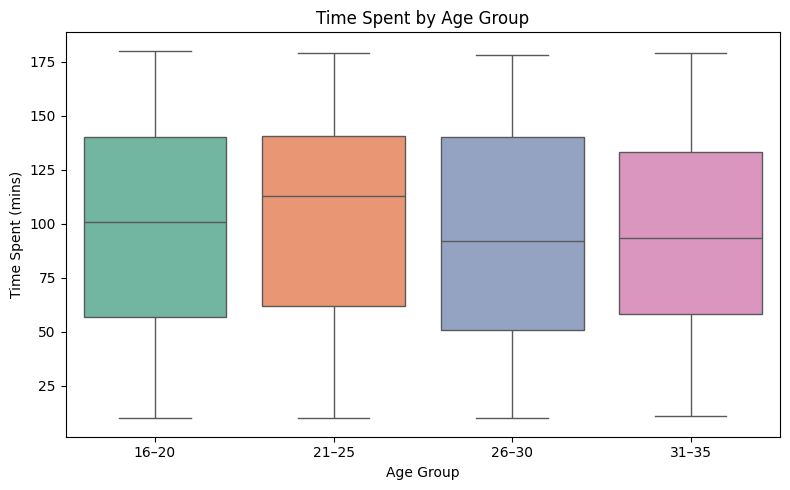

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=merged_students_courses, x='Age_Group', y='Time_Spent_Minutes', palette='Set2')
plt.title('Time Spent by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Time Spent (mins)')
plt.tight_layout()
plt.show()

Age group 21–25 shows the highest average engagement (101.83 mins).

In [ ]:

avg_engagement_time_by_location= merged_students_courses.groupby("Location")['Time_Spent_Minutes'].mean()
avg_engagement_time_by_location

,Time_Spent_Minutes
Location,
Bangalore,98.000000
Chennai,90.946746
Delhi,103.302857
Kolkata,104.384615
Mumbai,95.435484


Kolkata and Delhi students are the most engaged by location

**Average Feedback Rating per Course**

In [ ]:
average_feedbackrating_per_course=feedback.groupby('Course_ID')["Rating"].mean()
average_feedbackrating_per_course
print(f'Average Feedback Rating per Course',average_feedbackrating_per_course)

Average Feedback Rating per Course Course_ID
DM101    2.900000
PY202    3.277778
UX303    2.923077
WD404    2.789474
Name: Rating, dtype: float64


 PY202 is the highest-rated course with an average rating of 3.28, while
 WD404 is the lowest-rated course with a rating of 2.79.


**Correlation between completion rate and feedback rating**

In [ ]:
course_activity

,Student_ID,Course_ID,Date,Time_Spent_Minutes,Completion_Percentage
0,S001,PY202,2024-01-05,90,46.10
1,S001,DM101,2024-01-28,155,88.87
2,S001,UX303,2024-01-28,177,54.93
3,S002,PY202,2024-02-03,45,32.20
4,S002,UX303,2024-03-15,119,90.80
...,...,...,...,...,...
654,S100,PY202,2024-03-03,83,22.63
655,S100,UX303,2024-02-27,168,14.83
656,S100,UX303,2024-01-02,134,22.29
657,S100,WD404,2024-03-12,139,68.78


In [ ]:
feedback

,Student_ID,Course_ID,Rating,Feedback_Text
0,S057,UX303,2,Too fast-paced
1,S063,PY202,2,Loved the examples
2,S022,PY202,4,Could be better
3,S011,PY202,5,Needs improvement
4,S073,WD404,4,Could be better
...,...,...,...,...
75,S087,DM101,1,Well structured
76,S065,DM101,4,Loved the examples
77,S082,WD404,2,Too fast-paced
78,S067,DM101,5,Excellent instructor


In [ ]:
merged_course_feedback=pd.merge(course_activity,feedback,on=['Student_ID','Course_ID'])
merged_course_feedback[['Completion_Percentage','Rating']].corr()

,Completion_Percentage,Rating
Completion_Percentage,1.000000,-0.051708
Rating,-0.051708,1.000000


There is a very weak negative correlation (-0.05) between course completion percentage and feedback rating

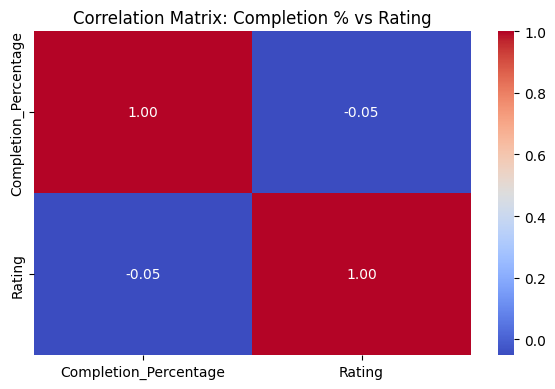

In [ ]:
corr = merged_course_feedback[['Completion_Percentage', 'Rating']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Completion % vs Rating')
plt.tight_layout()
plt.show()

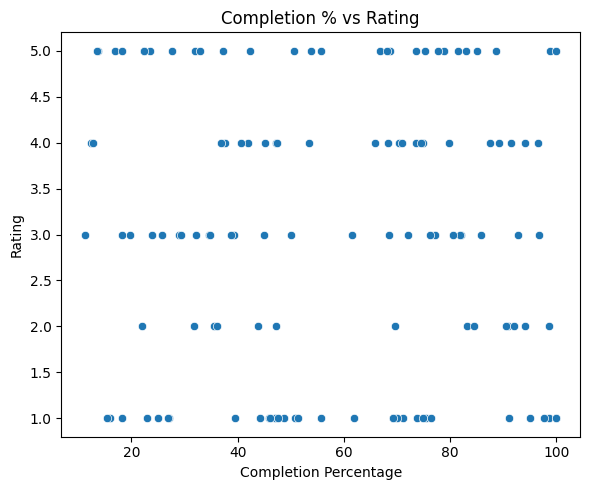

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=merged_course_feedback, x='Completion_Percentage', y='Rating', alpha=1)
plt.title('Completion % vs Rating')
plt.xlabel('Completion Percentage')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

**Top 3 student segments based on engagement and
satisfaction.**

In [ ]:
summary = merged_course_feedback.groupby('Student_ID')[['Time_Spent_Minutes', 'Rating']].mean()

In [ ]:
top_students = summary.sort_values(['Time_Spent_Minutes', 'Rating'], ascending=False).head(3)
top_students

,Time_Spent_Minutes,Rating
Student_ID,,
S036,175.0,5.0
S081,174.0,4.0
S064,173.0,4.0


**Engagement Trend Over Time**

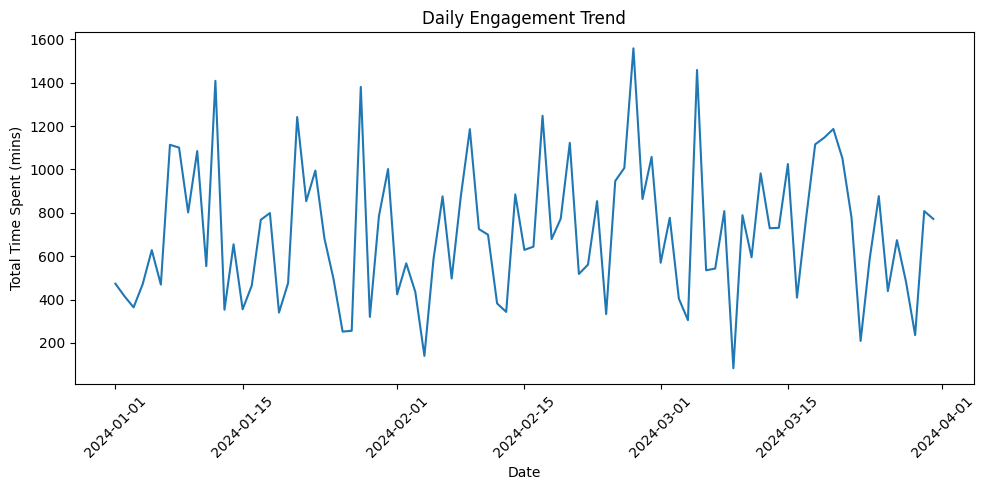

In [ ]:

engagement_trend = course_activity.groupby('Date')['Time_Spent_Minutes'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=engagement_trend, x='Date', y='Time_Spent_Minutes')
plt.title('Daily Engagement Trend')
plt.xlabel('Date')
plt.ylabel('Total Time Spent (mins)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The highest engagement was around 2024-03-03, with over 1,500 minutes spent.

Engagement goes up and down regularly, suggesting that students are most active on certain days — possibly due to deadlines or weekend study habits

**Insights**



1.   The overall average course completion rate is 54.78%, showing moderate student engagement.

2.   DM101 has the highest average engagement time (102.4 mins), while PY202 has the lowest (93.9 mins).

3.   PY202 is the highest-rated course (3.28), while WD404 is the lowest-rated (2.79).

4. Students aged 21–25 and those from Kolkata and Delhi show higher engagement on average.

5.  There's a very weak negative correlation (−0.05) between completion percentage and rating, suggesting satisfaction isn't tied to course completion alone.







**Recommendations**




1.  Explore what makes DM101 stand out—such as its structure, teaching style, or pace—and apply those strengths to improve courses like PY202 and WD404.

2.  Create content and messages that speak directly to students who are most engaged, especially those aged 21–25 and those from cities like Kolkata and Delhi.

3.  Since course ratings don’t really match how much students complete, use surveys to learn what students really care about—like how clear the lessons are or how helpful the instructor is.






